## Intro

[DSAI HW1](https://paper.dropbox.com/doc/DSAI-HW1-AutoTrading-V1OFhOpBZiXEfwtF9Ebj2)

## Visualize the stock data

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def visaulize(df):    
    plt.plot(df.open.values, color='red', label='open')
    plt.plot(df.close.values, color='green', label='close')
    plt.plot(df.low.values, color='blue', label='low')
    plt.plot(df.high.values, color='black', label='high')
    plt.title('stock price')
    plt.xlabel('time [days]')
    plt.ylabel('price')
    plt.legend(loc='best')
    plt.show()

### Training data

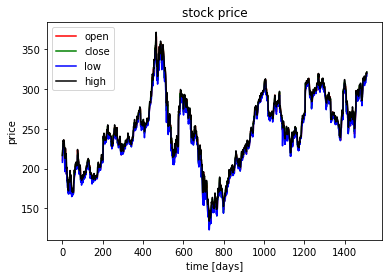

In [4]:
training_data = pd.read_csv('training_data.csv', header=None, names=['open', 'high', 'low', 'close'])
visaulize(training_data)

### Testing data

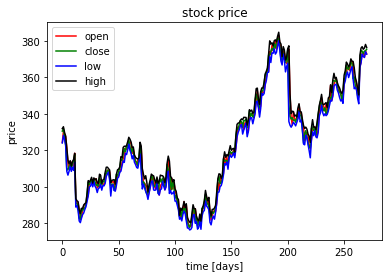

In [5]:
testing_data = pd.read_csv('testing_data.csv', header=None, names=['open', 'high', 'low', 'close'])
visaulize(testing_data)

## Strategy

NOT LEARNING AT ALL!! <br>
JUST HIGH-SELL-LOW-BUY

## Implement

In [6]:
def determine_actions(stock_data):
    global status
    status = 0
    actions = list()
    stock_trend = 0
    yesterday_price = stock_data.loc[0]['close']

    for price in stock_data['close']:
        if price < yesterday_price:

            if stock_trend >= 0:
                stock_trend = 0

            # The stock price goes up, so sell it
            action = -1 if stock_trend == 0 and is_valid(-1) else 0
            stock_trend += -1

        elif price > yesterday_price:
    
            if stock_trend <= 0:
                stock_trend = 0
            
            # The stock price goes down, so buy it
            action = 1 if stock_trend == 0 and is_valid(1) else 0
            stock_trend += 1

        else:
            action = 0

        actions.append(action)
        yesterday_price = price
        
    # skip the last day action
    actions = actions[:-1]
    return actions

## Result

In [7]:
import trader

In [8]:
def cal_profit(stock_data, actions):
    profit = 0
    status = 0
    
    if len(stock_data) != len(actions) + 1:
        return None
    
    for price, action in zip(stock_data['open'][1:-1], actions):
        status += action
        if status > 1 or status < -1:
            return None
        
        else:
            profit += price * action * -1
            #print('price: {} action: {} status: {}'.format(price, action, status))
            #print('profit: {}'.format(profit))

    # Settle stock in the last day
    profit += status * stock_data.iloc[-1]['close']
    return profit

### Training data

In [9]:
actions = trader.determine_actions(training_data)
cal_profit(training_data, actions)

120.50087799999986

### Testing data

In [10]:
actions = trader.determine_actions(testing_data)
cal_profit(testing_data, actions)

16.72131100000007